<a href="https://colab.research.google.com/github/kiranmali1992/Machine-Learning/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hierarchical clustering**

Hierarchical clustering is also know as hierarchical cluster, which is used to collect similer type of object.
Endpoint is set of cluster each cluster is distinct from each other but object withing the cluster are similer.

In [ ]:
#Importing module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/segments.csv")
data.head(10)

,Feature 1,Feature 2,Feature 3,Feature 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Text(0.5, 0, 'Type')

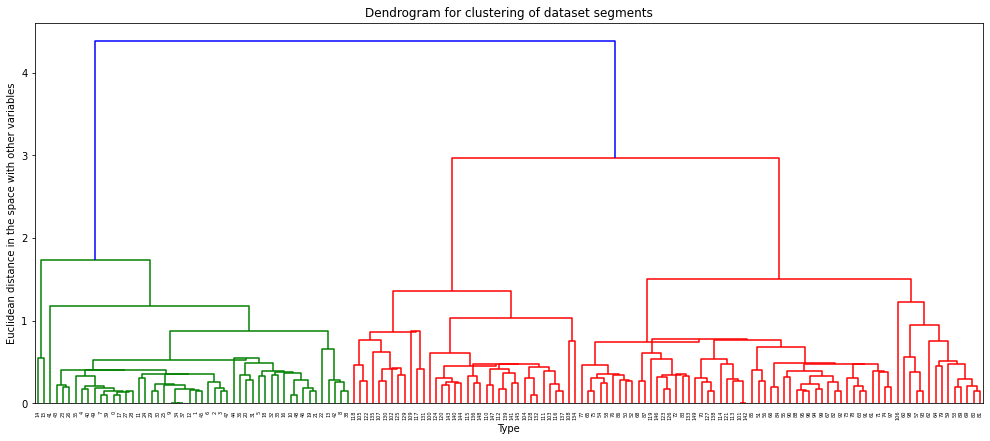

In [ ]:
#Plot dendrogram 
# which helps us in deciding what the threshold values should be for the clustering algorithm
# Basically, we decide the number of clusters by using this dendrogram.
#Using method median
X = sch.linkage(data,method = "median")
plt.figure(figsize =(17,7))
den = sch.dendrogram(X)
plt.title("Dendrogram for clustering of dataset segments")
plt.ylabel("Euclidean distance in the space with other variables")
plt.xlabel("Type")

Text(0.5, 0, 'Type')

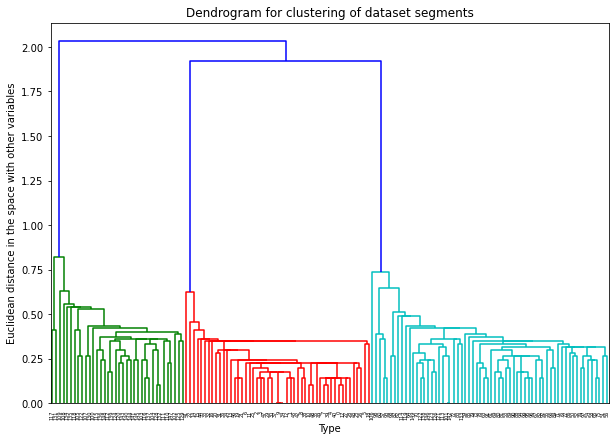

In [ ]:
# Using method Single linkage
X= sch.linkage(data,method = "single")
plt.figure(figsize = (10,7))
den = sch.dendrogram(X)
plt.title("Dendrogram for clustering of dataset segments")
plt.ylabel("Euclidean distance in the space with other variables")
plt.xlabel("Type")

Text(0.5, 0, 'Type')

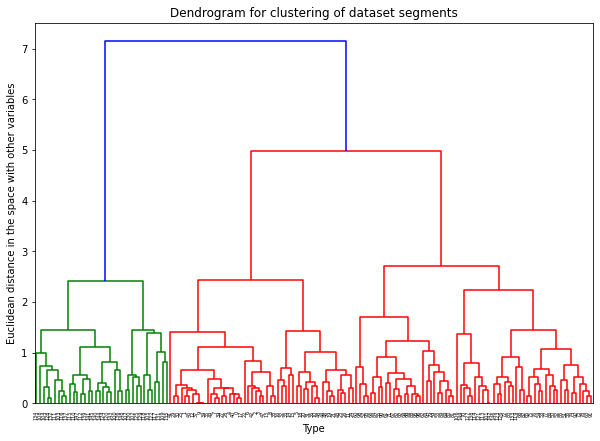

In [ ]:
# Using method complete linkage
X= sch.linkage(data,method = "complete")
plt.figure(figsize = (10,7))
den = sch.dendrogram(X)
plt.title("Dendrogram for clustering of dataset segments")
plt.ylabel("Euclidean distance in the space with other variables")
plt.xlabel("Type")

Text(0.5, 0, 'Type')

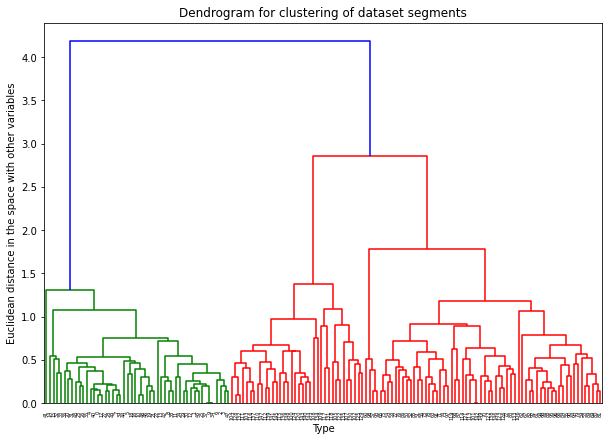

In [ ]:
# Using method Average linkage
X= sch.linkage(data,method = "average")
plt.figure(figsize = (10,7))
den = sch.dendrogram(X)
plt.title("Dendrogram for clustering of dataset segments")
plt.ylabel("Euclidean distance in the space with other variables")
plt.xlabel("Type")

**Agglomerative clustering**

In [ ]:

# Building an Agglomerative clustering
# from above dendrogram we decide that no_cluster = 3
cluster_H = AgglomerativeClustering(n_clusters = 3,linkage = "average")

#After building Agglomerative clustering now fit segment data
model = cluster_H.fit(data)

model

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
# Predicting Output Class
print("Output cluster are")
pred = model.labels_
print(pred)
unique , count = np.unique(pred,return_counts= True)
print(dict(zip(unique,count)))

Output cluster are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
{0: 64, 1: 50, 2: 36}


**Silhouette Score**

In [ ]:
print("Cluster assign to data")
print(dict(zip(unique,count)))
# silhouette score for 3 cluster
print(silhouette_score(data,pred))

Cluster assign to data
{0: 64, 1: 50, 2: 36}
0.5539343898551252


In [ ]:
# checking silhouette score for different value of cluster
for k in range(2,10):
  cluster_H = AgglomerativeClustering(n_clusters= k, linkage="average")
  model = cluster_H.fit(data)
  pred1 = model.labels_
  print(f"Silhouette score for cluster {k}:",silhouette_score(data,pred1))

Silhouette score for cluster 2: 0.6863930543445408
Silhouette score for cluster 3: 0.5539343898551252
Silhouette score for cluster 4: 0.47166531675930684
Silhouette score for cluster 5: 0.4303416822141368
Silhouette score for cluster 6: 0.34065865237555976
Silhouette score for cluster 7: 0.36941067750646717
Silhouette score for cluster 8: 0.3645436084191249
Silhouette score for cluster 9: 0.31677604290958056


**Visualization output**

In [ ]:
data["No_cluster"] = pred

In [ ]:
data.head()

,Feature 1,Feature 2,Feature 3,Feature 4,No_cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
cluster_group = data[data["No_cluster"] == 0]
cluster_group1 = data[data["No_cluster"] == 1]
cluster_group2 = data[data["No_cluster"] == 2]

Text(0, 0.5, 'Feature 2')

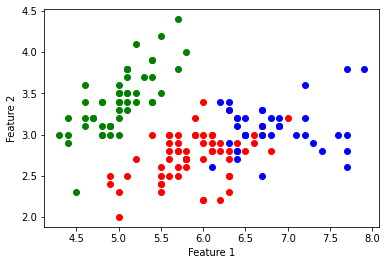

In [ ]:
plt.scatter(cluster_group["Feature 1"],cluster_group["Feature 2"],color = "r")
plt.scatter(cluster_group1["Feature 1"],cluster_group1["Feature 2"],color = "g")
plt.scatter(cluster_group2["Feature 1"],cluster_group2["Feature 2"],color = "b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")